# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Jobish Vallikavungal Devassia 

## **Actividad Semanal -- 6, visualización**



- Cristian R. Miranda Jimenez - A01793718

### Carga de modulos

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### 1. Descarga los datos y carga el dataset en tu libreta. 

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [11]:
df.rename(columns={ "X1":"credit",
                    "X2":"gender",
                    "X3":"education",
                    "X4":"status",
                    "X5":"age",
                    "X6":"repayment_0905",
                    "X7":"repayment_0805",
                    "X8":"repayment_0705",
                    "X9":"repayment_0605",
                    "X10":"repayment_0505",
                    "X11":"repayment_0405",
                    "X12":"bill_0905",
                    "X13":"bill_0805",
                    "X14":"bill_0705",
                    "X15":"bill_0605",
                    "X16":"bill_0505",
                    "X17":"bill_0405",
                    "X18":"paid_0905",
                    "X19":"paid_0805",
                    "X20":"paid_0705",
                    "X21":"paid_0605",
                    "X22":"paid_0505",
                    "X23":"paid_0405"
                   },inplace=True)

df.columns.values

array(['ID', 'credit', 'gender', 'education', 'status', 'age',
       'repayment_0905', 'repayment_0805', 'repayment_0705',
       'repayment_0605', 'repayment_0505', 'repayment_0405', 'bill_0905',
       'bill_0805', 'bill_0705', 'bill_0605', 'bill_0505', 'bill_0405',
       'paid_0905', 'paid_0805', 'paid_0705', 'paid_0605', 'paid_0505',
       'paid_0405', 'Y'], dtype=object)

### 2. Obten la información del DataFrame con los métodos y propiedades

In [20]:
print("Dimension:\n",df.shape)

Dimension:
 (30000, 25)


In [21]:
print("\nColumns:\n",df.columns)


Columns:
 Index(['ID', 'credit', 'gender', 'education', 'status', 'age',
       'repayment_0905', 'repayment_0805', 'repayment_0705', 'repayment_0605',
       'repayment_0505', 'repayment_0405', 'bill_0905', 'bill_0805',
       'bill_0705', 'bill_0605', 'bill_0505', 'bill_0405', 'paid_0905',
       'paid_0805', 'paid_0705', 'paid_0605', 'paid_0505', 'paid_0405', 'Y'],
      dtype='object')


In [22]:
# Primeras filas
df.head()

,ID,credit,gender,education,status,age,repayment_0905,repayment_0805,repayment_0705,repayment_0605,...,bill_0605,bill_0505,bill_0405,paid_0905,paid_0805,paid_0705,paid_0605,paid_0505,paid_0405,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [23]:
# Tipo de datos
df.dtypes

ID                  int64
credit              int64
gender            float64
education         float64
status            float64
age               float64
repayment_0905    float64
repayment_0805    float64
repayment_0705    float64
repayment_0605    float64
repayment_0505    float64
repayment_0405    float64
bill_0905         float64
bill_0805         float64
bill_0705         float64
bill_0605         float64
bill_0505         float64
bill_0405         float64
paid_0905         float64
paid_0805         float64
paid_0705         float64
paid_0605         float64
paid_0505         float64
paid_0405         float64
Y                 float64
dtype: object

In [24]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   credit          30000 non-null  int64  
 2   gender          29999 non-null  float64
 3   education       29998 non-null  float64
 4   status          29998 non-null  float64
 5   age             29995 non-null  float64
 6   repayment_0905  29997 non-null  float64
 7   repayment_0805  29995 non-null  float64
 8   repayment_0705  29993 non-null  float64
 9   repayment_0605  29991 non-null  float64
 10  repayment_0505  29984 non-null  float64
 11  repayment_0405  29986 non-null  float64
 12  bill_0905       29989 non-null  float64
 13  bill_0805       29989 non-null  float64
 14  bill_0705       29987 non-null  float64
 15  bill_0605       29985 non-null  float64
 16  bill_0505       29983 non-null  float64
 17  bill_0405       29990 non-null 

In [30]:
# Valores perdidos
df.isna().sum()

ID                 0
credit             0
gender             1
education          2
status             2
age                5
repayment_0905     3
repayment_0805     5
repayment_0705     7
repayment_0605     9
repayment_0505    16
repayment_0405    14
bill_0905         11
bill_0805         11
bill_0705         13
bill_0605         15
bill_0505         17
bill_0405         10
paid_0905          8
paid_0805          9
paid_0705          8
paid_0605         11
paid_0505         11
paid_0405          5
Y                  3
dtype: int64

### 3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna


In [33]:
# Al ser pocas filas que cuentan con valores perdidos, se decide eliminar los registros nulo
df = df.dropna()
df.shape

(29958, 25)

### 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,29958.0,15005.550504,8654.547473,1.0,7516.25,15005.5,22497.75,30000.0
credit,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
gender,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
education,29958.0,1.853094,0.790471,0.0,1.00,2.0,2.00,6.0
status,29958.0,1.551739,0.521952,0.0,1.00,2.0,2.00,3.0
age,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
repayment_0905,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
repayment_0805,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
repayment_0705,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
repayment_0605,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0


### 5. Realiza el conteo de las variables categóricas

In [129]:
#[x for x in list(df.columns.values) if x not in var_cat]
var_cont = ['credit', 'age','bill_0905', 'bill_0805','bill_0705', 'bill_0605', 'bill_0505', 'bill_0405', 'paid_0905',
       'paid_0805', 'paid_0705', 'paid_0605', 'paid_0505', 'paid_0405']

var_cat = ['gender','education','status','repayment_0905', 'repayment_0805', 'repayment_0705', 'repayment_0605',
       'repayment_0505', 'repayment_0405']
len(var_cat)

9

### 6. Escala los datos, si consideras necesario

In [142]:
scaler = StandardScaler()
scaler.fit(df[var_cont])
X = scaler.transform(df[var_cont])

### 7. Reduce las dimensiones con PCA

#### 7.1 Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [145]:
pcs = PCA()
pcs.fit(X) # df.loc[:, var_cont].dropna(axis=0)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4329,1.3099,1.0223,0.9619,0.9401,0.9342,0.8830,0.8524,0.8410,0.5142,0.2665,0.2026,0.1592,0.1525
Proportion of variance,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5453,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


Con la componente 5 se supera el umbral del 70% de acuerdo a la tabla previamente mostrada

#### 7.2 Indica la importancia de las variables en cada componente

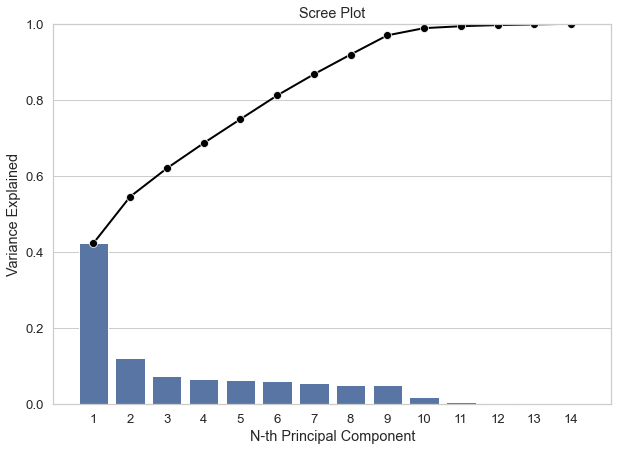

In [151]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

En el gráfico se muestra la imporancia de cada una de las componentes. Tal como se mostró previamente, con 5 compoenntes se logra más del 70% de varianza

In [150]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.loc[:, var_cont].columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
credit,0.165507,0.300709,-0.378575,-0.200103,0.035312
age,0.032789,0.071906,-0.869471,0.338990,-0.039760
bill_0905,0.372446,-0.190793,-0.034207,-0.063899,0.041391
bill_0805,0.383253,-0.174644,-0.001814,0.007629,0.083164
bill_0705,0.388264,-0.126883,0.034747,0.060528,0.113790
bill_0605,0.391557,-0.120403,0.034073,0.074774,0.028378
bill_0505,0.388505,-0.105928,0.033882,0.039553,-0.106756
bill_0405,0.380672,-0.094157,0.018489,-0.070616,-0.164986
paid_0905,0.135120,0.383194,0.173845,0.362055,0.225652
paid_0805,0.116768,0.408391,0.200925,0.345745,0.148714


En esta tabla se muestra las componentes y las variables que considera cada una como mejor explicación. Para el caso de la primer componente por ejemplo, se evidencia que todas las variables relacionadas con los `bill` (mayores valores), la segunda componente explica bien algunas variables de `paid`, la componente 3 explica la edad, la cuarta conaidera el `paid_0505` y la última el resto de variables no consideradas.

### 8. Elabora los histogramas de los atributos para visualizar su distribución

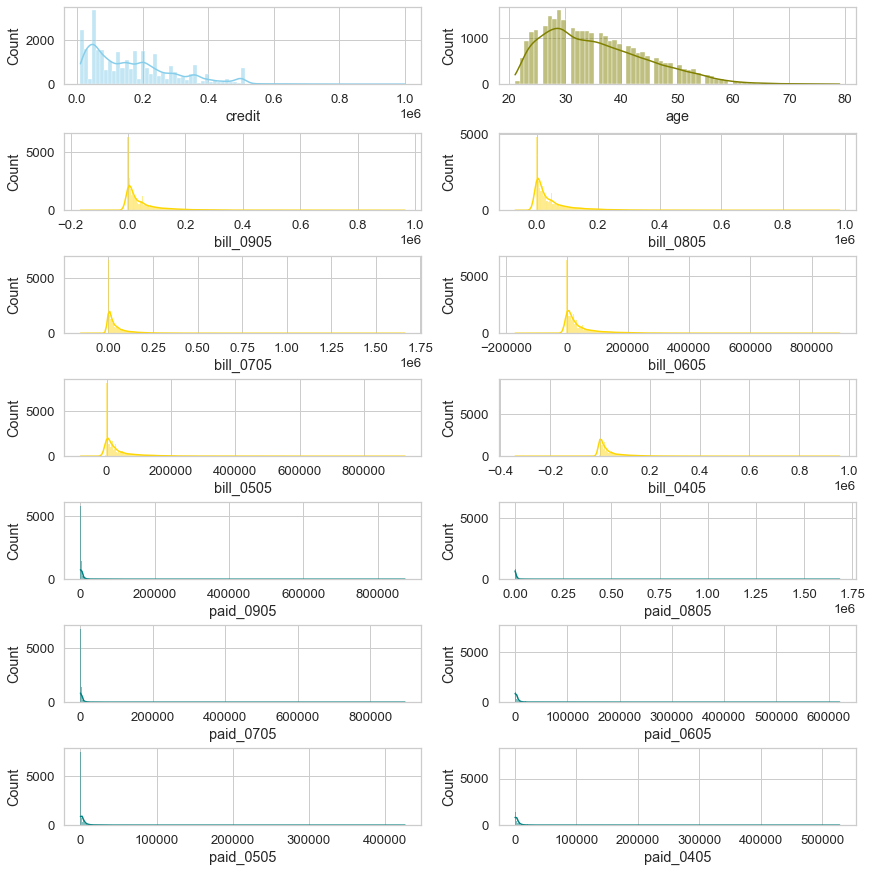

In [159]:
# Histograma de variables continuas

fig, axs = plt.subplots(7, 2, figsize=(12, 12),constrained_layout=True)

sns.histplot(data=df, x="credit", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="age", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="bill_0905", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="bill_0805", kde=True, color="gold", ax=axs[1, 1])
sns.histplot(data=df, x="bill_0705", kde=True, color="gold", ax=axs[2, 0])
sns.histplot(data=df, x="bill_0605", kde=True, color="gold", ax=axs[2, 1])
sns.histplot(data=df, x="bill_0505", kde=True, color="gold", ax=axs[3, 0])
sns.histplot(data=df, x="bill_0405", kde=True, color="gold", ax=axs[3, 1])
sns.histplot(data=df, x="paid_0905", kde=True, color="teal", ax=axs[4, 0])
sns.histplot(data=df, x="paid_0805", kde=True, color="teal", ax=axs[4, 1])
sns.histplot(data=df, x="paid_0705", kde=True, color="teal", ax=axs[5, 0])
sns.histplot(data=df, x="paid_0605", kde=True, color="teal", ax=axs[5, 1])
sns.histplot(data=df, x="paid_0505", kde=True, color="teal", ax=axs[6, 0])
sns.histplot(data=df, x="paid_0405", kde=True, color="teal", ax=axs[6, 1])

plt.show()

### 9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados

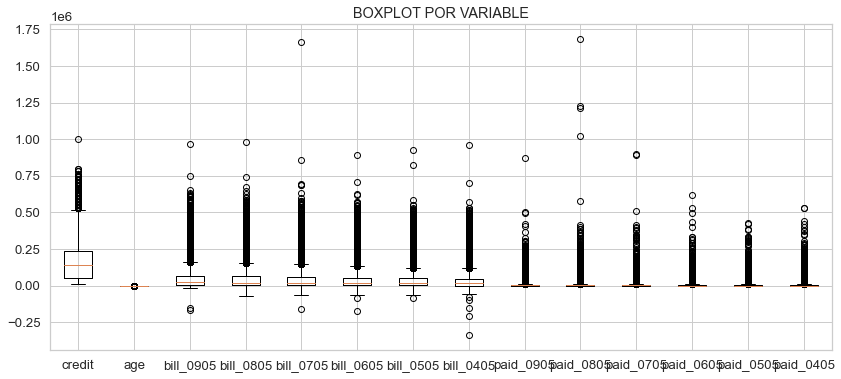

In [160]:
# Boxplot
plt.figure(figsize=(14,6))
plt.boxplot(df[var_cont],labels=var_cont)
plt.title("BOXPLOT POR VARIABLE")
plt.show()

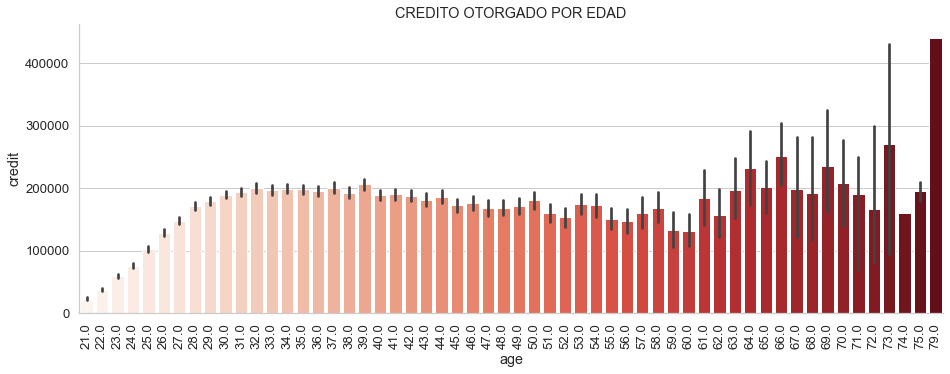

In [161]:
# Catplot
sns.catplot(data=df, y="credit",x="age", kind="bar",aspect=2.7 , palette="Reds")
plt.xticks(rotation=90)
plt.title("CREDITO OTORGADO POR EDAD")
plt.show()

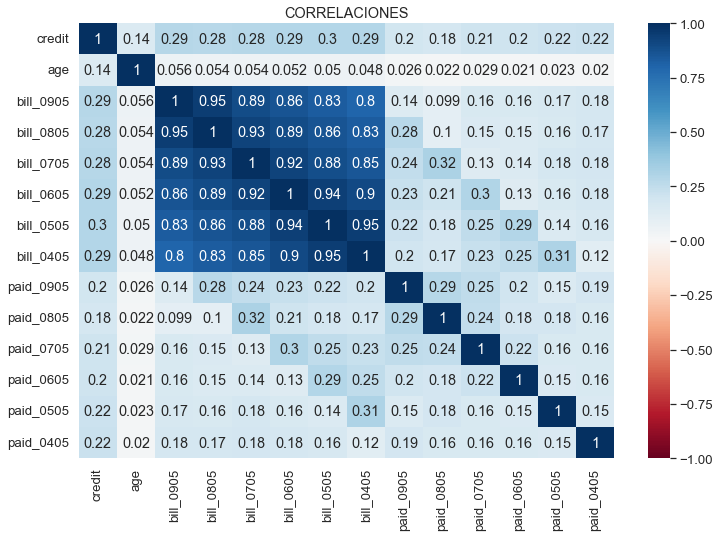

In [167]:
# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap( df[var_cont].corr(), annot=True, vmin=-1,vmax=1,cmap='RdBu')
plt.title("CORRELACIONES")
plt.show()

### 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

- **Boxplot:** este gráfico facilita la visualización de los valores atípicos en cada una de las variable. Se puede identificar que en cada una de ellas se tiene valores con mucha dispersión.
- **Catplot:** para poder tener una idea del crédito que se le brinda a las personas de acuerdo a su rango de edad, en este gráfico de barras se identifica que las personas con corta edad no acceden a grandes cantidades mientras que una persona mayor (a lo mejor por su patrimonio) acceden a cantidades superiores.
- **Heatmap:** el heatmap permite identificar la correlación de cada una de las variables. Para el dataset del ejercicio, las variables de `bill` tienen la mayor relación entre ellas (cerca de 1)